In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
import time

1. На вход передатчика сигнала подается сигнал косинуса с частотами 50 и 150 Гц.

Время работы FFT: 0.000319 секунд
Время работы Медленного DFT: 0.056540 секунд


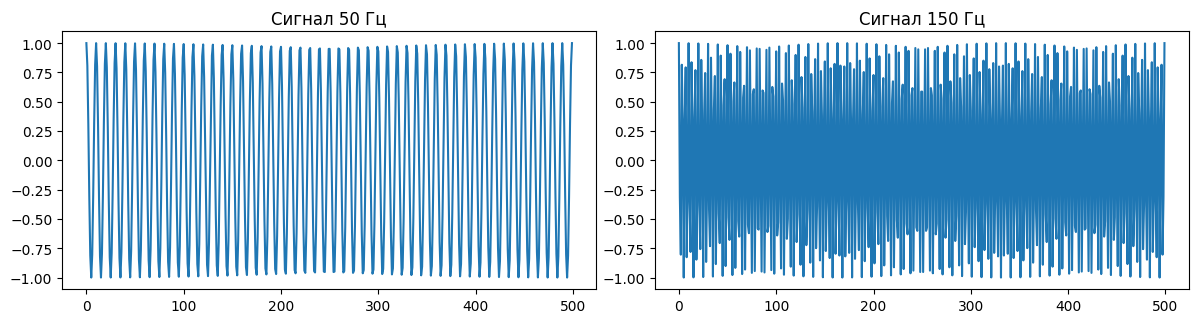

In [ ]:
def DFT_slow(x):
  x = np.asarray(x, dtype=float)
  N = x.shape[0]
  n = np.arange(N)
  k = n.reshape((N, 1))
  M = np.exp(-2j * np.pi * k * n / N)
  return np.dot(M, x)

fs = 500
t = np.linspace(0, 1, fs)
signal_50 = np.cos(2 * np.pi * 50 * t)
signal_150 = np.cos(2 * np.pi * 150 * t)

# Время работы FFT
start_time = time.time()
fft_result_50 = fft(signal_50)
fft_result_150 = fft(signal_150)
end_time = time.time()
time_fft = end_time - start_time

# Время работы медленного DFT
start_time = time.time()
dft_slow_result_50 = DFT_slow(signal_50)
dft_slow_result_150 = DFT_slow(signal_150)
end_time = time.time()
time_dft_slow = end_time - start_time

print(f"Время работы FFT: {time_fft:.6f} секунд")
print(f"Время работы Медленного DFT: {time_dft_slow:.6f} секунд")

plt.figure(figsize=(12, 12))

plt.subplot(4, 2, 1)
plt.plot(signal_50)
plt.title('Сигнал 50 Гц')

plt.subplot(4, 2, 2)
plt.plot(signal_150)
plt.title('Сигнал 150 Гц')

plt.tight_layout()
plt.show()


(a) Постройте дискретный спектр сигнала с помощью стандартной функции быстрого
преобразования Фурье fft() и функции DFT_slow(). Сравните время вычисления этих двух
функций.

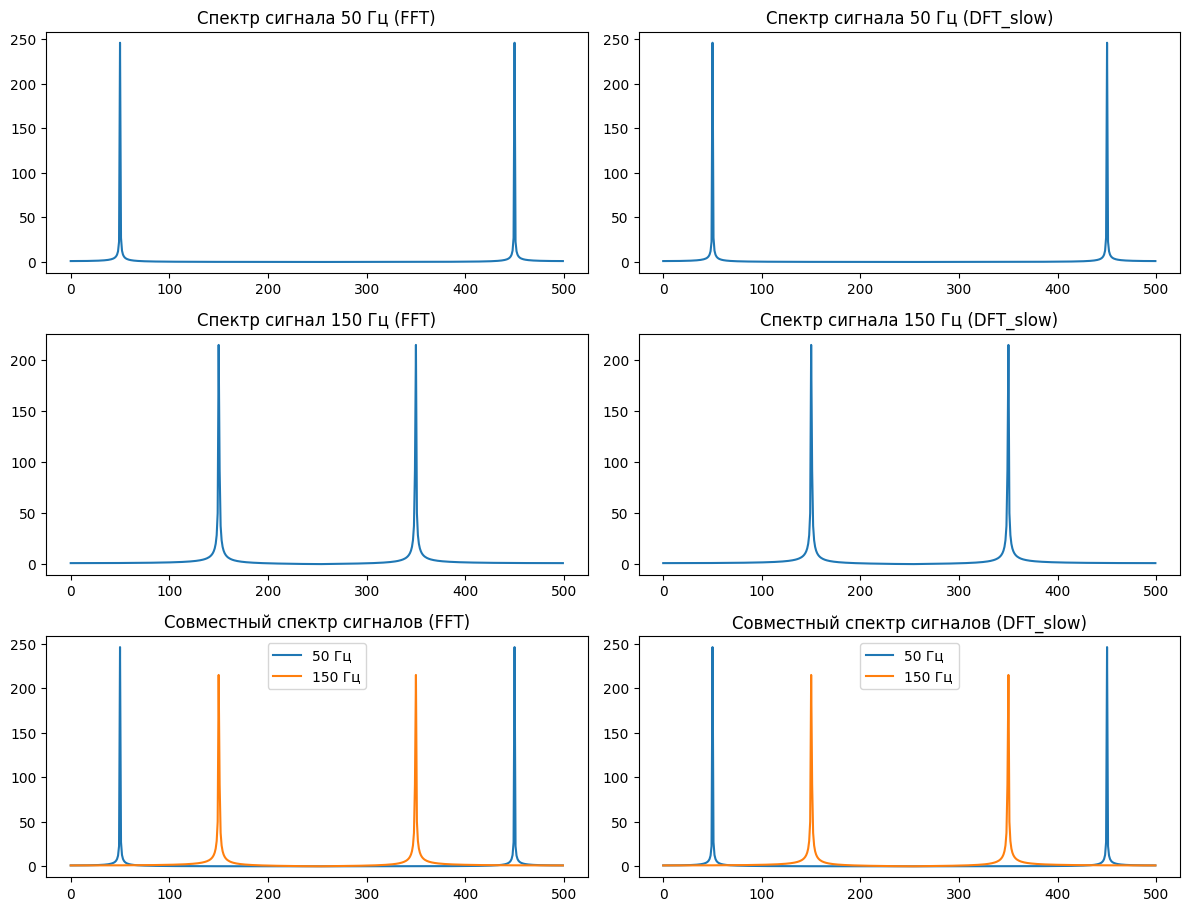

In [ ]:
plt.figure(figsize=(12, 12))

plt.subplot(4, 2, 1)
plt.plot(np.abs(fft_result_50))
plt.title('Спектр сигнала 50 Гц (FFT)')

plt.subplot(4, 2, 2)
plt.plot(np.abs(dft_slow_result_50))
plt.title('Спектр сигнала 50 Гц (DFT_slow)')

plt.subplot(4, 2, 3)
plt.plot(np.abs(fft_result_150))
plt.title('Спектр сигнал 150 Гц (FFT)')

plt.subplot(4, 2, 4)
plt.plot(np.abs(dft_slow_result_150))
plt.title('Спектр сигнала 150 Гц (DFT_slow)')

plt.subplot(4, 2, 5)
plt.plot(np.abs(fft_result_50), label='50 Гц')
plt.plot(np.abs(fft_result_150), label='150 Гц')
plt.title('Совместный спектр сигналов (FFT)')
plt.legend()

plt.subplot(4, 2, 6)
plt.plot(np.abs(dft_slow_result_50), label='50 Гц')
plt.plot(np.abs(dft_slow_result_150), label='150 Гц')
plt.title('Совместный спектр сигналов (DFT_slow)')
plt.legend()

plt.tight_layout()
plt.show()

(б) С помощью функции быстрого обратного преобразования Фурье ifft() убедитесь, что
форма сигнала не изменилась.

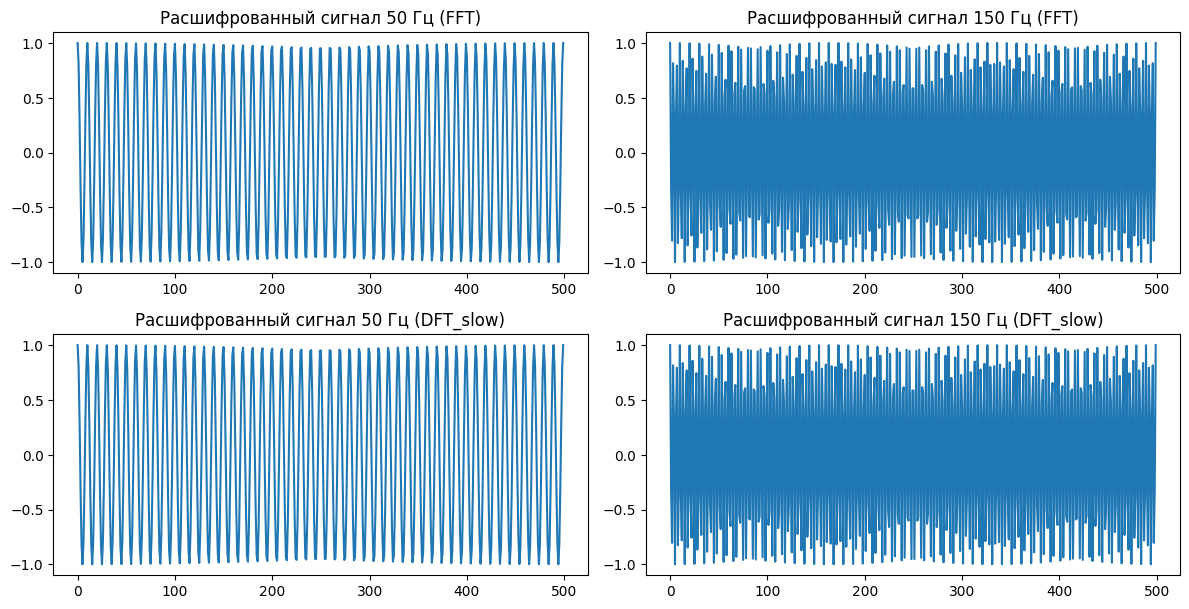

In [ ]:
ifft_fresult_50 = ifft(fft_result_50)
ifft_fresult_150 = ifft(fft_result_150)

ifft_dresult_50 = ifft(dft_slow_result_50)
ifft_dresult_150 = ifft(dft_slow_result_150)

plt.figure(figsize=(12, 12))

plt.subplot(4, 2, 1)
plt.plot(ifft_fresult_50)
plt.title('Расшифрованный сигнал 50 Гц (FFT)')

plt.subplot(4, 2, 2)
plt.plot(ifft_fresult_150)
plt.title('Расшифрованный сигнал 150 Гц (FFT)')

plt.subplot(4, 2, 3)
plt.plot(ifft_dresult_50)
plt.title('Расшифрованный сигнал 50 Гц (DFT_slow)')

plt.subplot(4, 2, 4)
plt.plot(ifft_dresult_150)
plt.title('Расшифрованный сигнал 150 Гц (DFT_slow)')

plt.tight_layout()
plt.show()

(в) После распространения сигнала в линии на приемнике был получен сигнал, искаженный
белым шумом. Постройте дискретный спектр зашумленного сигнала на приемнике.
Возьмите обратное преобразование Фурье и посмотрите, как поменялась форма принятого
сигнала после распространения в линии.

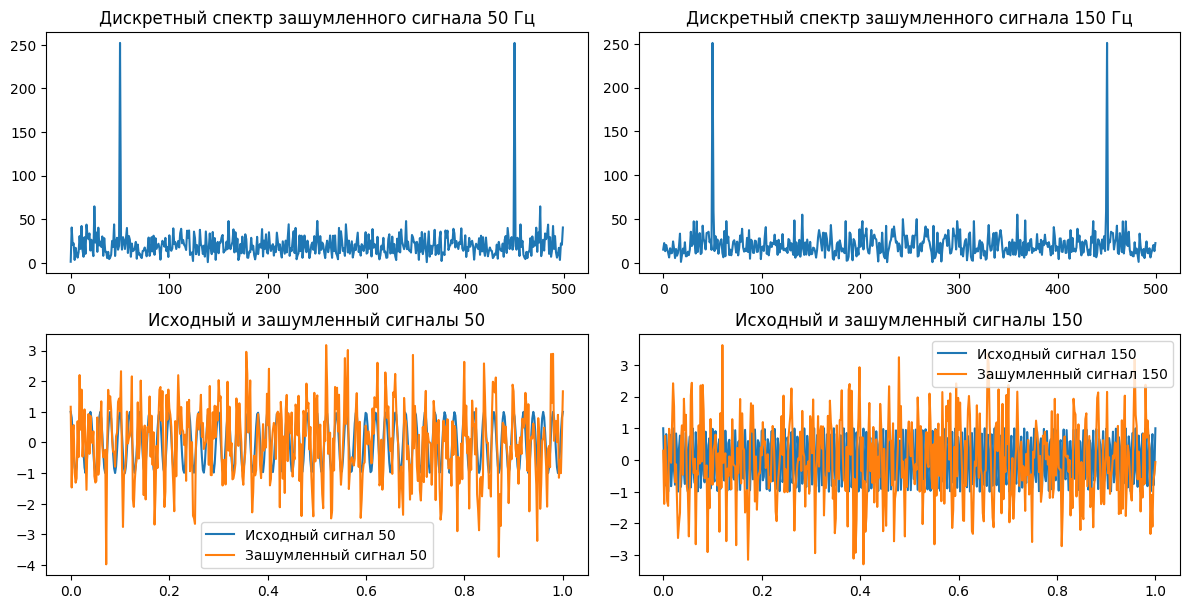

In [ ]:
noise_50 = np.random.normal(0, 1, signal_50.shape)
noisy_signal_50 = signal_50 + noise_50

noise_150 = np.random.normal(0, 1, signal_150.shape)
noisy_signal_150 = signal_50 + noise_150

fft_result_noisy_50 = fft(noisy_signal_50)
fft_result_noisy_150 = fft(noisy_signal_150)


inverse_fft_result_50 = ifft(fft_result_noisy_50)
inverse_fft_result_150 = ifft(fft_result_noisy_150)

plt.figure(figsize=(12, 12))
plt.subplot(4, 2, 1)
plt.plot(np.abs(fft_result_noisy_50))
plt.title('Дискретный спектр зашумленного сигнала 50 Гц')

plt.subplot(4, 2, 2)
plt.plot(np.abs(fft_result_noisy_150))
plt.title('Дискретный спектр зашумленного сигнала 150 Гц')

plt.subplot(4, 2, 3)
plt.plot(t, signal_50, label='Исходный сигнал 50')
plt.plot(t, inverse_fft_result_50, label='Зашумленный сигнал 50')
plt.title('Исходный и зашумленный сигналы 50')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(t, signal_150, label='Исходный сигнал 150')
plt.plot(t, inverse_fft_result_150, label='Зашумленный сигнал 150')
plt.title('Исходный и зашумленный сигналы 150')
plt.legend()

plt.tight_layout()
plt.show()


2. Исследуемый сигнал x(t) описывается периодическими прямоугольными
импульсами с амплитудой A=2, периодом T=2 на интервале времени от 0 до 4. Постройте
дискретный спектр сигнала с помощью стандартной функции быстрого преобразования
Фурье fft() и функции DFT_slow(). Наложите шум на данный сигнал, посмотрите спектр
зашумленного сигнала.

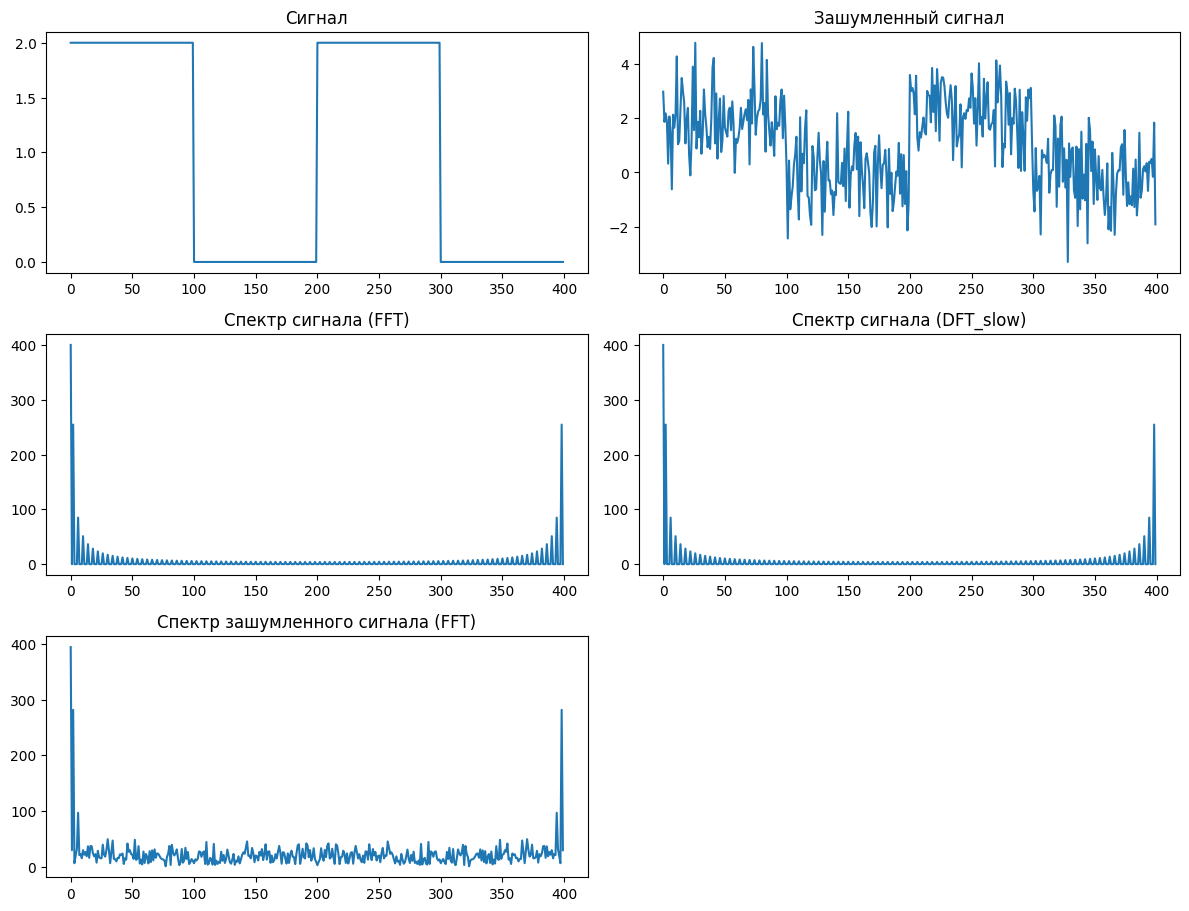

In [ ]:
A = 2
T = 2
t_start = 0
t_end = 4

fs = 100
t = np.arange(t_start, t_end, 1/fs)

x = A * (t % T < T/2)


def DFT_slow(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)


fft_result = fft(x)
dft_slow_result = DFT_slow(x)

noise = np.random.normal(0, 1, x.size)
x_noisy = x + noise

fft_result_noisy = fft(x_noisy)


plt.figure(figsize=(12, 12))

plt.subplot(4, 2, 1)
plt.plot(x)
plt.title('Сигнал')

plt.subplot(4, 2, 2)
plt.plot(x_noisy)
plt.title('Зашумленный сигнал')

plt.subplot(4, 2, 3)
plt.plot(np.abs(fft_result))
plt.title('Спектр сигнала (FFT)')


plt.subplot(4, 2, 4)
plt.plot(np.abs(dft_slow_result))
plt.title('Спектр сигнала (DFT_slow)')


plt.subplot(4, 2, 5)
plt.plot(np.abs(fft_result_noisy))
plt.title('Спектр зашумленного сигнала (FFT)')

plt.tight_layout()
plt.show()



3. Реализовать код для определения быстрого дискретного преобразования Фурье
(БДПФ). Убедиться, что функция написана верно, для этого рассмотреть сигнал косинуса с
частотой 50 Гц и убедиться, что сигнал имеет одну выделенную частоту 50 Гц. Сравните
время выполнения написанного кода для реализации (БДПФ) с встроенной функцией
(БДПФ) fft().

Время выполнения собственной БДПФ: 0.009003 секунд
Время выполнения встроенной БДПФ: 0.001208 секунд


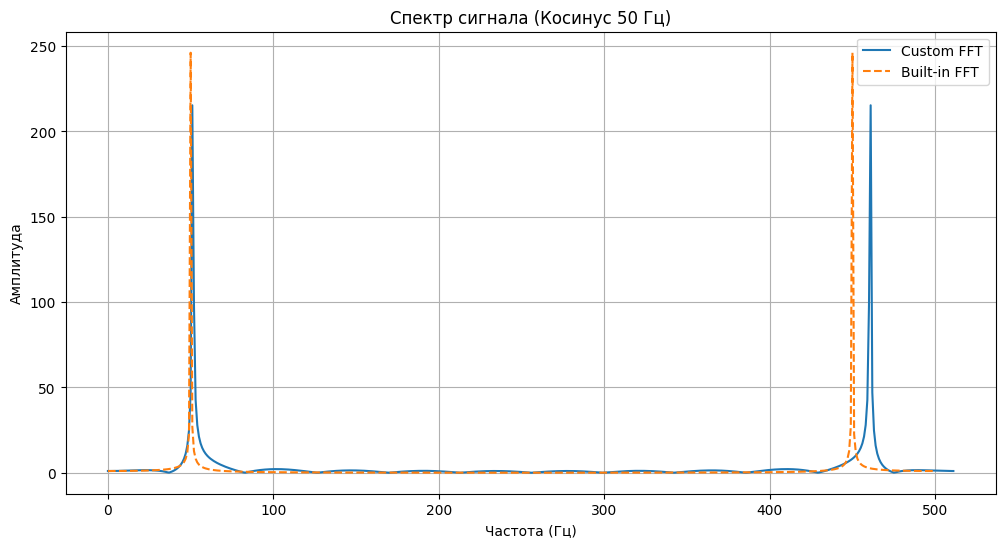

In [ ]:
def is_power_of_two(n):
    return n and (n & (n - 1)) == 0

def fft_recursive(x):
    N = len(x)
    # Если длина не является степенью двойки, заполним массив нулями
    if not is_power_of_two(N):
        next_power_of_two = 2**np.ceil(np.log2(N)).astype(int)
        x = np.concatenate((x, [0] * (next_power_of_two - N)))
        N = len(x)

    if N <= 1:
        return x

    # Четные и нечетные части
    even = fft_recursive(x[0::2])
    odd = fft_recursive(x[1::2])
    T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
    return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]



start_custom_fft = time.time()
custom_fft_result = fft_recursive(signal_50)
end_custom_fft = time.time()

start_builtin_fft = time.time()
builtin_fft_result = np.fft.fft(signal_50)
end_builtin_fft = time.time()

custom_fft_time = end_custom_fft - start_custom_fft
builtin_fft_time = end_builtin_fft - start_builtin_fft

print(f"Время выполнения собственной БДПФ: {custom_fft_time:.6f} секунд")
print(f"Время выполнения встроенной БДПФ: {builtin_fft_time:.6f} секунд")


plt.figure(figsize=(12, 6))
plt.plot(np.abs(custom_fft_result), label='Custom FFT')
plt.plot(np.abs(builtin_fft_result), label='Built-in FFT', linestyle='--')
plt.title("Спектр сигнала (Косинус 50 Гц)")
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.legend()
plt.grid()
plt.show()
